# Fashion-MNIST

URL: https://github.com/zalandoresearch/fashion-mnist

Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.

![alt text](https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/doc/img/fashion-mnist-sprite.png)


## Problem

Classify the fashion article given the image

## Data

Data is obtained from `keras.datasets.fashion_mnist`

## Features

Each training and test example is assigned to one of the following labels:

**Label- Description**

0-	T-shirt/top

1-	Trouser

2-	Pullover

3-	Dress

4-	Coat

5-	Sandal

6-	Shirt

7-	Sneaker

8-	Bag

9-	Ankle boot


## Building the model

### Loading the data

In [0]:
# Import the necessary libraries

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import np_utils 
import random

Using TensorFlow backend.


In [0]:
# Import the data from keras.dataset

(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

In [0]:
# Check out the shape of the dataset

print("Train Images Shape:",train_images.shape)
print("Train Labels Shape:",train_labels.shape)
print("Test Images Shape:",test_images.shape)
print("Test Labels Shape:",test_labels.shape)

Train Images Shape: (60000, 28, 28)
Train Labels Shape: (60000,)
Test Images Shape: (10000, 28, 28)
Test Labels Shape: (10000,)


<Figure size 432x288 with 0 Axes>

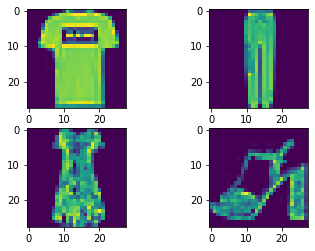

In [0]:
# Check out loaded images!

plt.figure()

fig,ax = plt.subplots(2,2)

ax[0][0].imshow(train_images[1])
ax[0][1].imshow(train_images[1000])
ax[1][0].imshow(train_images[22000])
ax[1][1].imshow(train_images[44000])

### Data pre-processing

In [0]:
# We normalise the loaded images
# i.e we convert the pixel values which lie between 0-255 into values between 0-1

train_images = train_images/255.0
test_images = test_images/255.0

### Creating a model

In [0]:
# We are building a sequential model

model = tf.keras.models.Sequential()

# Add the input layer

model.add(tf.keras.layers.Flatten(input_shape=(28,28)))

# Add a hidden layer

model.add(tf.keras.layers.Dense(units=128, activation="relu"))

# Add an output layer

model.add(tf.keras.layers.Dense(units=10))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Fit the training data to the model

In [0]:
# fit the data to the model

history = model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4935 - accuracy: 0.8267
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3747 - accuracy: 0.8642
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3362 - accuracy: 0.8780
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3132 - accuracy: 0.8850
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2951 - accuracy: 0.8927
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2817 - accuracy: 0.8971
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2688 - accuracy: 0.9013
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2565 - accuracy: 0.9045
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2490 - accuracy: 0.9077
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.239

## Test the model on the test data

In [0]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3352 - accuracy: 0.8832

Test accuracy: 0.8831999897956848


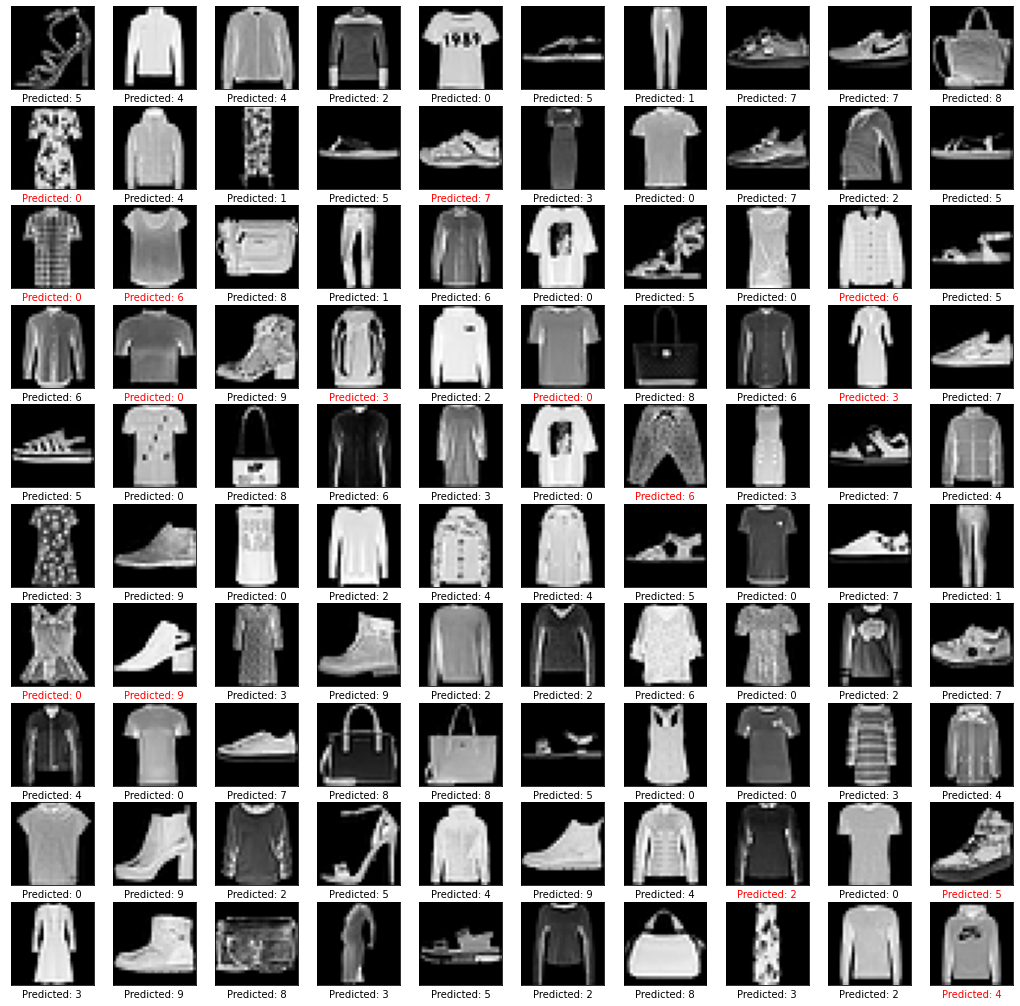

In [0]:
# A helper function that returns 'red'/'black' depending on if its two input
# parameter matches or not.

def get_label_color(val1, val2):
  if val1 == val2:
    return 'black'
  else:
    return 'red'

# Predict the labels of digit images in our test dataset.

predictions = model.predict(test_images)

# As the model output 10 float representing the probability of the input image
# being a digit from 0 to 9, we need to find the largest probability value
# to find out which digit the model predicts to be most likely in the image.

prediction_digits = np.argmax(predictions, axis=1)

# Then plot 100 random test images and their predicted labels.
# If a prediction result is different from the label provided label in "test"
# dataset, we will highlight it in red color.

plt.figure(figsize=(18, 18))
for i in range(100):
  ax = plt.subplot(10, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  image_index = random.randint(0, len(prediction_digits))
  plt.imshow(test_images[image_index], cmap=plt.cm.gray)
  ax.xaxis.label.set_color(get_label_color(prediction_digits[image_index],\
                                           test_labels[image_index]))
  plt.xlabel('Predicted: %d' % prediction_digits[image_index])
plt.show()